In [1]:
import os
import numpy as np
datapath = '/data/gtEx'
pairfile = os.path.join(datapath, 'Brain_Caudate_basal_ganglia_Analysis_cis-eQTLs.txt')
snpfile = os.path.join(datapath, 'GTEx_Analysis_2015-01-12_OMNI_2.5M_5M_450Indiv_chr1-22+X_genot_imput_info04_maf01_HWEp1E6_variant_id_lookup.txt')
tssfile = os.path.join(datapath, 'tss.txt')
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [123]:
max_nl = 200000
l = 0
pair_data = []
with open(pairfile) as f:
    for line in f:
        ls = line.split()
        l += 1
        if l>max_nl:
            break
                  
        if ls[0][:5] == 'ENSG0':
            if ls[1][:2] == '1_':
                pair_data.append([ls[0], ls[1], ls[-1]])
            else:
                break

In [124]:
len(pair_data)

199999

In [125]:
ps = np.array([item[-1] for item in pair_data]).astype(np.float32)

(array([ 6860.,  4621.,  4335.,  4529.,  4318.,  4299.,  4179.,  4447.,
         4199.,  4241.,  4174.,  4051.,  3994.,  3887.,  4042.,  4047.,
         4029.,  3860.,  3898.,  3681.,  3879.,  3853.,  3830.,  3846.,
         3822.,  3913.,  3786.,  3752.,  3719.,  3775.,  3656.,  3847.,
         3887.,  3823.,  3795.,  3882.,  3781.,  3684.,  3720.,  3801.,
         3986.,  3775.,  3908.,  3690.,  3770.,  3790.,  3912.,  3737.,
         3843.,  3846.]),
 array([  4.54653979e-12,   1.99999201e-02,   3.99998403e-02,
          5.99997604e-02,   7.99996805e-02,   9.99996007e-02,
          1.19999521e-01,   1.39999441e-01,   1.59999361e-01,
          1.79999281e-01,   1.99999201e-01,   2.19999121e-01,
          2.39999042e-01,   2.59998962e-01,   2.79998882e-01,
          2.99998802e-01,   3.19998722e-01,   3.39998642e-01,
          3.59998562e-01,   3.79998482e-01,   3.99998403e-01,
          4.19998323e-01,   4.39998243e-01,   4.59998163e-01,
          4.79998083e-01,   4.99998003e-01,   

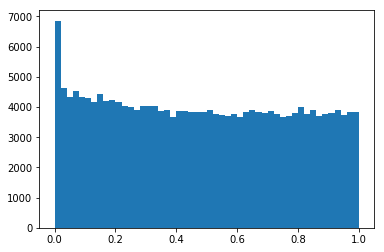

In [126]:
plt.hist(ps, 50)

In [128]:
max_nl = 2000000
l = 0
snp = []
with open(snpfile) as f:
    for line in f:
        ls = line.split()
        l += 1
        if l>max_nl:
            break
         
        if ls[0] == '1':
            snp.append(ls[1:3][::-1])
            

In [129]:
snp = dict(snp)

In [130]:
genes = np.unique([item[0].split('.')[0] for item in pair_data])

In [131]:
gene_dict = {}
with open(tssfile) as f:
    for line in f:
        ls = line.strip().split(',')
        if ls[0] in genes:
            gene_dict[ls[0]] = ls[-1]

In [132]:
data = []
for item in pair_data:
    g = item[0].split('.')[0]
    if g in gene_dict:
        x = gene_dict[g]
        #print x
        p = float(item[-1])
        
        tss_x = snp[item[1]]
        x = abs(int(tss_x) - int(x))
        data.append([x,p])
        
data = np.array(data)

In [133]:
from sideinfo import *

In [164]:
BH(data[:,1], alpha = 0.05)

(726, 0.00019156899999999999)

In [165]:
Storey_BH(data[:,1], alpha = 0.05)

(736, 0.00020438300000000001, 0.9538080120616248)

In [136]:
x = np.log(data[:,0])
p = data[:,1]

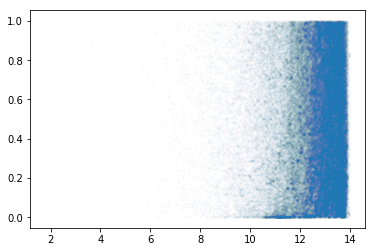

In [141]:
plt.scatter(x, p, 2, alpha = 0.01)

In [142]:
network = get_network(scale = 0.01)
optimizer = optim.Adagrad(network.parameters(), lr = 0.01)

In [143]:
p_target = np.ones(x.shape) * Storey_BH(p)[1]
loss_hist = train_network_to_target_p(network, optimizer, x, p_target, num_it = 3000)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


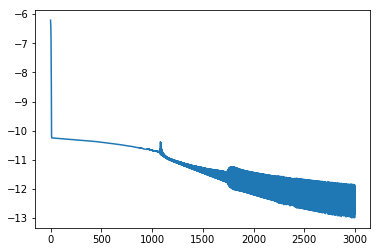

In [144]:
plt.plot(np.log(loss_hist))

In [ ]:
#optimizer = optim.Adagrad(network.parameters(), lr = 0.01)
loss_hist, s, s2 = train_network(network, optimizer, x, p, num_it = 1000, lambda_=20, lambda2_ = 1e4)

0
100
200
300


In [ ]:
plt.plot(loss_hist)
print(s,s2, s2/s)

In [ ]:
n_samples = len(x)
x_input = Variable(torch.from_numpy(x.astype(np.float32).reshape(n_samples ,1)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))
output = network.forward(x_input)
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

In [ ]:
plt.scatter(x, output.data.numpy(), 2)

In [ ]:
sum(pred)